<a href="https://colab.research.google.com/github/ByronHernandez/Images/blob/main/coins/PracticeProblems5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice Problems 6

## Section 10.7

### Exercise 3

Consider an image with 100 coins of various sizes spread on a uniform background. Assume that the coins do not touch each other, write a pseudo code to determine the number of coins for each size. Brave soul: Write a Python program to accomplish this. Hint: regionprops will be needed.


In [ ]:
!wget https://github.com/ByronHernandez/Images/blob/main/coins/coins1.png

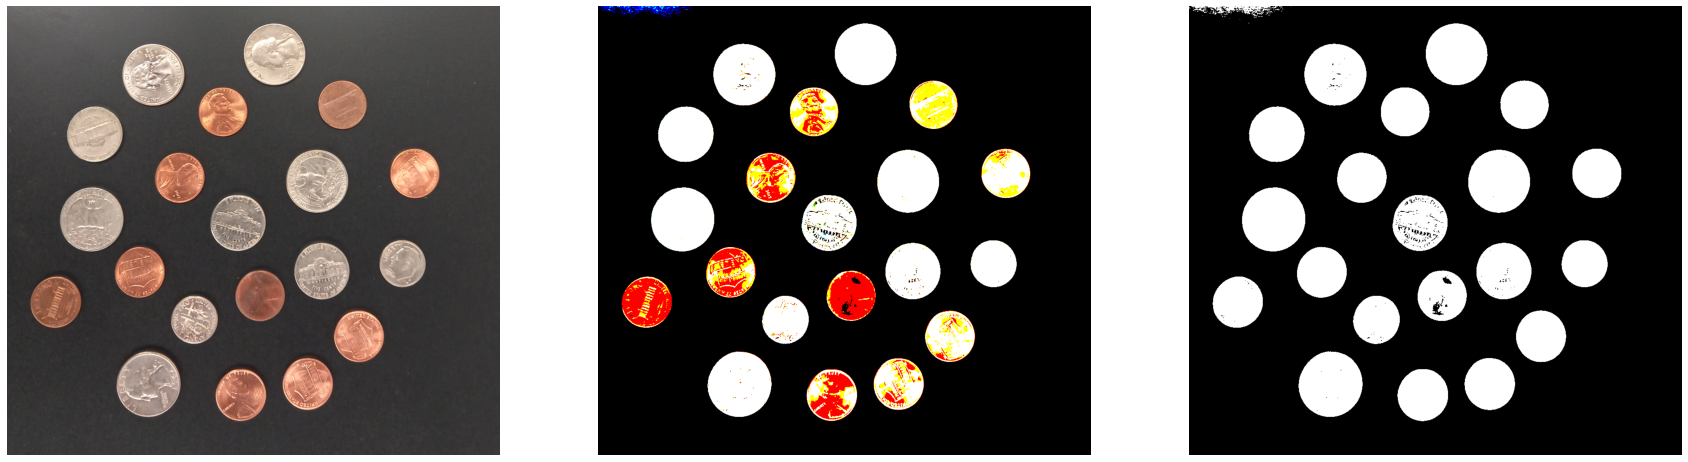

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage.morphology as morph
from skimage.measure import regionprops
from skimage.filters import threshold_otsu

# 1. Read the image
a = plt.imread('coins1.png')

# 2. Segment the image using a proper thresholding method
f = np.zeros_like(a)
bw = np.zeros_like(a[:, :, 0])
for i in range(3):
    ti = threshold_otsu(a[:, :, i])  # Otsu's
    f[:, :, i] = a[:, :, i] >= ti
    bw = np.logical_or(bw, f[:, :, i])
# Visualization
plt.rcParams["figure.figsize"] = 30, 30
plt. subplot(1,3,1), plt.imshow(a, 'gray'), plt.axis('off')
plt. subplot(1,3,2), plt.imshow(f, 'gray'), plt.axis('off')
plt. subplot(1,3,3), plt.imshow(bw, 'gray'), plt.axis('off')
plt.show()

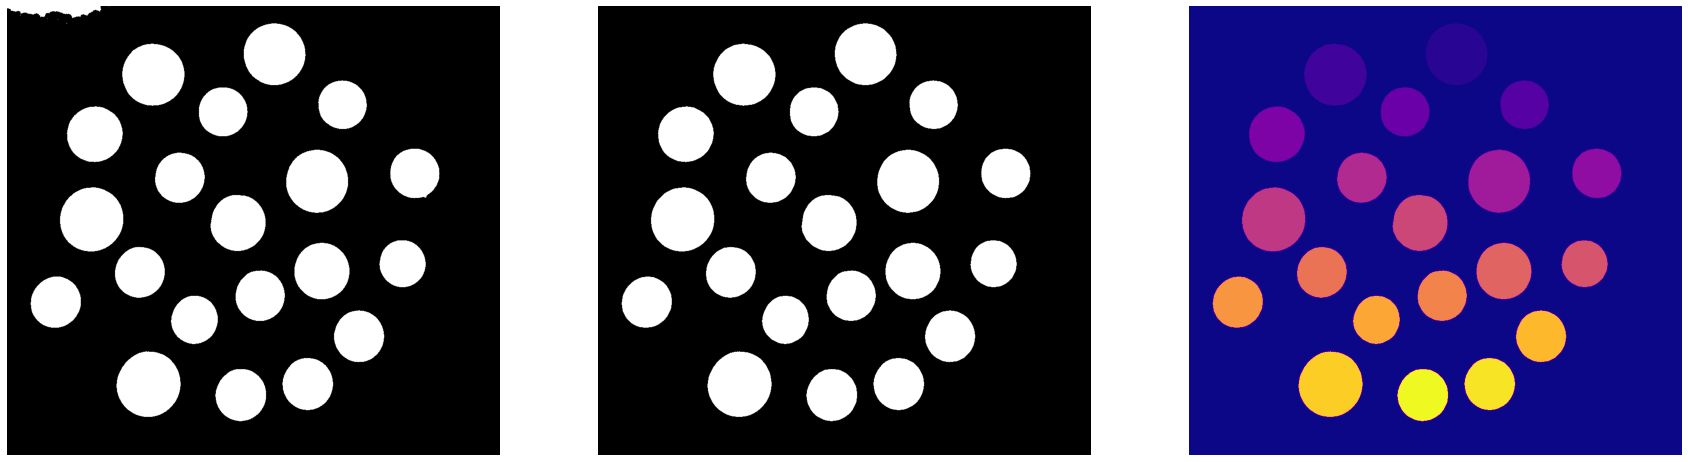

In [3]:
# Morphological filtering
r = 5
se = np.zeros((2*r+1, 2*r+1))
x, y = np.meshgrid(range(2*r+1), range(2*r+1))
se[(x-r)**2+(y-r)**2 <= r**2] = 1
bw1 = morph.binary_closing(bw, se) # Closing

r = 25
se = np.zeros((2*r+1, 2*r+1))
x, y = np.meshgrid(range(2*r+1), range(2*r+1))
se[(x-r)**2+(y-r)**2 <= r**2] = 1
bw2 = morph.binary_opening(bw1, se)  # Opening

# 3. Label the connected components
c = morph.label(bw2)
# Visualization
plt.rcParams["figure.figsize"] = 30, 30
plt.subplot(1,3,1), plt.imshow(bw1, 'gray'), plt.axis('off')
plt.subplot(1,3,2), plt.imshow(bw2, 'gray'), plt.axis('off')
plt.subplot(1,3,3), plt.imshow(c, 'plasma'), plt.axis('off')
plt.show()

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  fig.canvas.print_figure(bytes_io, **kw)


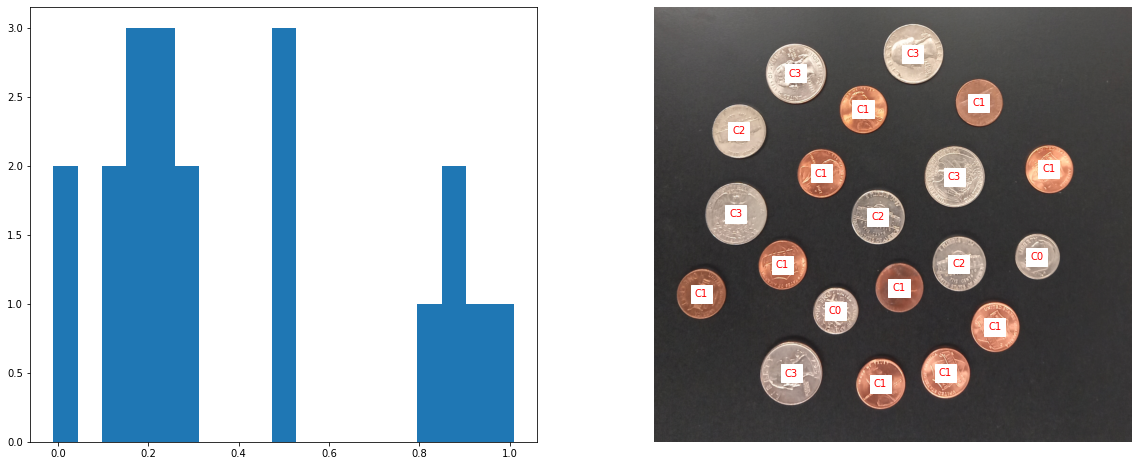

In [4]:
# For later visualization
plt.rcParams["figure.figsize"] = 20, 8
# 4. Compute regionprops in the labeled image
d = regionprops(c)
# 5. Obtain the perimeter using the `Area' property
fe = []
for i in d:
    fe.append(np.sqrt(i['area']))
# Normalization
ma = max(fe)
mi = min(fe)
fe = (fe - mi) / (ma - mi)
# 6. Compute a histogram of perimeters.
bins = np.linspace(-0.01, 1.01, len(fe))
plt.subplot(1,2,1)
p, _, _ = plt.hist(fe, bins)
# 7. Determine the range of the perimeters 
#    for different classes.
ranges = []
lo, hi = bins[0], bins[1]
for i in range(1, len(p)):
    if p[i] > 0 and p[i - 1] > 0:
        hi = bins[i + 1]
    elif p[i] > 0:
        hii = hi + (bins[i] - hi) / 2
        ranges.append([lo, hii])
        lo, hi = hii, bins[i + 1]
ranges.append([lo, hi])
# De-normalize the ranges
ranges = np.array(ranges) * (ma - mi) + mi
# Visualization of the original image
plt.subplot(1,2,2), plt.imshow(a), plt.axis('off')
# 8. Classify each coin on the corresponding range
#    and increment the corresponding counter.
classes = np.arange(len(ranges))
counts = np.zeros_like(classes)
for i in range(len(d)):
    fe = np.sqrt(d[i]['area'])
    ce = d[i]['centroid']
    mask = ranges > fe
    clas = classes[np.logical_xor.reduce(mask, 1)]
    counts[clas] += 1 
    plt.text(ce[1], ce[0], 'C%d' % (clas), c='R',
             backgroundcolor='w', ha='center', va='center')
plt.show()

In [5]:
# Return the number coins on each range
for c in classes:
    print('Number of C%d: %d' % (c, counts[c]))

Number of C0: 2
Number of C1: 10
Number of C2: 3
Number of C3: 5
